ÇALIŞMADA HAZIR SPEKTROGRAMLAR KULLANILDI.
ÖN İŞLEME VE CNN MODELİ TEK KOD ÜZERİNDE ÇALIŞILDI.

**ÖNCE GEREKLİ KÜTÜPHANELER, TOOLLAR YÜKLENDİ**

In [ ]:
# Importing
import tensorflow as tf
from tensorflow import keras
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

**SPEKTROGRAMLAR ÜZERİNDEN ÖN İŞLEME**

In [ ]:
# Define & Grayscale
drive.mount("/content/drive/")

image_0 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/0/*.png")]
image_1 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/1/*.png")]
image_2 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/2/*.png")]
image_3 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/3/*.png")]
image_4 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/4/*.png")]
image_5 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/5/*.png")]
image_6 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/6/*.png")]
image_7 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/7/*.png")]
image_8 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/8/*.png")]
image_9 = [cv2.imread(file) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/9/*.png")]

gray_0 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/0/*.png")]
gray_1 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/1/*.png")]
gray_2 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/2/*.png")]
gray_3 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/3/*.png")]
gray_4 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/4/*.png")]
gray_5 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/5/*.png")]
gray_6 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/6/*.png")]
gray_7 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/7/*.png")]
gray_8 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/8/*.png")]
gray_9 = [cv2.imread(file,0) for file in glob.glob ("/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/9/*.png")]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Resizing
newsize = (128,128)
normalizedImg = np.zeros(newsize)
values = []
all_gray = []

all_gray.append(gray_0)
all_gray.append(gray_1)
all_gray.append(gray_2)
all_gray.append(gray_3)
all_gray.append(gray_4)
all_gray.append(gray_5)
all_gray.append(gray_6)
all_gray.append(gray_7)
all_gray.append(gray_8)
all_gray.append(gray_9)

for order in range(0,10):
  for i in range(0,len(all_gray[order])):
    resized = cv2.resize(gray_0[i], newsize, interpolation = cv2.INTER_AREA)
    normal0 = cv2.normalize(resized, normalizedImg, 0, 255, cv2.NORM_MINMAX)
    path0 = glob.glob(f"/content/drive/MyDrive/globalaihub bootcamp/spectrogramlar/{order}/*.png")
    fn = os.path.basename(path0[i])
    file_name = os.path.splitext(fn)[0]
    folder_number = order
    values.append([file_name, normal0, order])
  print(f"{order}. klasördeki dosyaların grayscale dönüşümü tamamlandı")
  
columns = ['Name', 'Picture', 'File']
all_images = pd.DataFrame.from_records(values, columns=columns)
all_images.to_csv(r"all_images.csv", encoding="utf-8", index=False)

0. klasördeki dosyaların grayscale dönüşümü tamamlandı
1. klasördeki dosyaların grayscale dönüşümü tamamlandı
2. klasördeki dosyaların grayscale dönüşümü tamamlandı
3. klasördeki dosyaların grayscale dönüşümü tamamlandı
4. klasördeki dosyaların grayscale dönüşümü tamamlandı
5. klasördeki dosyaların grayscale dönüşümü tamamlandı
6. klasördeki dosyaların grayscale dönüşümü tamamlandı
7. klasördeki dosyaların grayscale dönüşümü tamamlandı
8. klasördeki dosyaların grayscale dönüşümü tamamlandı
9. klasördeki dosyaların grayscale dönüşümü tamamlandı


In [ ]:
pd.read_csv('all_images.csv')

,Name,Picture,File
0,100852-0-0-22,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
1,100852-0-0-23,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
2,100852-0-0-21,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
3,100852-0-0-20,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
4,100852-0-0-18,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,0
...,...,...,...
8727,99180-9-0-0,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9
8728,99179-9-0-19,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9
8729,99179-9-0-17,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9
8730,99179-9-0-12,[[255 67 0 ... 0 0 0]\n [255 68 0 ...,9


**X & Y VERİ SETLERİ İLE CNN MODEL EĞİTİMİ**

In [ ]:
# x & y Trains
x = all_images['Picture']
y = all_images.loc[:,'File']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_temporary, y_train, y_temporary = train_test_split(x, y, train_size=0.8, random_state=42) 
x_val, x_test, y_val, y_test = train_test_split(x_temporary, y_temporary, test_size=0.5, random_state=42)

# Convulation and Max Layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (128, 128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu', input_shape = (128, 128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (2,2), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (128, 128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Flatten, Dense, Dropout
model.add(tf.keras.layers.Flatten())

for i in range(0,2):
 model.add(tf.keras.layers.Dense(64,input_shape=(128, 128),activation = 'relu'))
 model.add(tf.keras.layers.Dropout(0.5))

# Output layer
model.add(tf.keras.layers.Dense(10, input_shape=(128, 128), activation='softmax'))

# Data Type Change
x_train = np.array([np.array(train) for train in x_train])
x_val = np.array([np.array(val) for val in x_val])
x_test = np.array([np.array(test) for test in x_test])

#Shape Check
x_val.shape

(873, 128, 128)

In [ ]:
# Model Training
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
results = model.fit(x_train, y_train, batch_size=128, epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
55/55 [==============================] - 85s 2s/step - loss: 3.0037 - accuracy: 0.1094 - val_loss: 2.2966 - val_accuracy: 0.1226
Epoch 2/10
55/55 [==============================] - 78s 1s/step - loss: 2.2923 - accuracy: 0.1137 - val_loss: 2.2912 - val_accuracy: 0.1226
Epoch 3/10
55/55 [==============================] - 80s 1s/step - loss: 2.2862 - accuracy: 0.1092 - val_loss: 2.2861 - val_accuracy: 0.1226
Epoch 4/10
55/55 [==============================] - 77s 1s/step - loss: 2.2806 - accuracy: 0.1105 - val_loss: 2.2819 - val_accuracy: 0.1226
Epoch 5/10
55/55 [==============================] - 77s 1s/step - loss: 2.2767 - accuracy: 0.1155 - val_loss: 2.2783 - val_accuracy: 0.0962
Epoch 6/10
55/55 [==============================] - 77s 1s/step - loss: 2.2724 - accuracy: 0.1135 - val_loss: 2.2751 - val_accuracy: 0.1226
Epoch 7/10
55/55 [==============================] - 78s 1s/step - loss: 2.2695 - accuracy: 0.1072 - val_loss: 2.2727 - val_accuracy: 0.0962
Epoch 8/10
55/55 [==

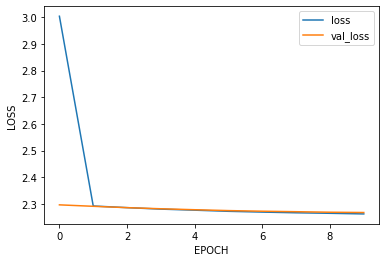

In [ ]:
# Losses
plt.plot(results.history['loss'], label = 'loss')
plt.plot(results.history['val_loss'], label = 'val_loss')

# Plot
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()

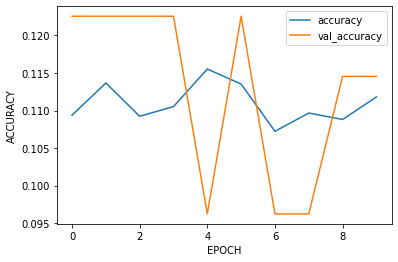

In [ ]:
# Accuracy
plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

# Plot
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

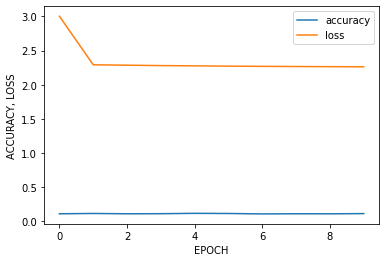

In [ ]:
# Merging the Plots
plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['loss'], label = 'loss')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY, LOSS')
plt.legend()
plt.show()

In [ ]:
# Performance
model.evaluate(x_test, y_test)

28/28 [==============================] - 6s 225ms/step - loss: 2.2694 - accuracy: 0.1064


[2.2693989276885986, 0.10640732198953629]

In [ ]:
# Hyperparameter functions
def hyperparameter(padding = 'same', activation = 'relu', units = 10, optimizer='adam'):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = padding, activation = activation, input_shape = (128,128,1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = padding, activation = activation))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = padding, activation = activation))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.MaxPooling2D((2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64, activation = activation))
  model.add(tf.keras.layers.Dropout(0.5))  
  model.add(tf.keras.layers.Dense(64, activation = activation))
  model.add(tf.keras.layers.Dropout(0.5)) 
  model.add(tf.keras.layers.Dense(units, activation='softmax'))  
  model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def modelfitting(X_train, y_train, X_val,y_val,batch_size = 128, epochs = 10):
  results = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val,y_val))
  return results 

In [32]:
#Activation
activationL = ['relu', 'sigmoid', 'elu', 'exponential']
scores = []

for i in (activationL):
  model = hyperparameter(activation = i)
  results = modelfitting(x_train, y_train, x_val,y_val,epochs = 10)
  loss_accuracy  = model.evaluate(x_test, y_test)
  scores.append((i, loss_accuracy))

Epoch 1/10
55/55 [==============================] - 182s 3s/step - loss: 3.4432 - accuracy: 0.1105 - val_loss: 2.2970 - val_accuracy: 0.1065
Epoch 2/10
55/55 [==============================] - 184s 3s/step - loss: 2.2934 - accuracy: 0.1175 - val_loss: 2.2914 - val_accuracy: 0.1065
Epoch 3/10
55/55 [==============================] - 179s 3s/step - loss: 2.2874 - accuracy: 0.1155 - val_loss: 2.2868 - val_accuracy: 0.1031
Epoch 4/10
55/55 [==============================] - 179s 3s/step - loss: 2.2823 - accuracy: 0.1135 - val_loss: 2.2827 - val_accuracy: 0.1065
Epoch 5/10
55/55 [==============================] - 179s 3s/step - loss: 2.2780 - accuracy: 0.1134 - val_loss: 2.2794 - val_accuracy: 0.1065
Epoch 6/10
55/55 [==============================] - 178s 3s/step - loss: 2.2742 - accuracy: 0.1168 - val_loss: 2.2767 - val_accuracy: 0.1065
Epoch 7/10
55/55 [==============================] - 179s 3s/step - loss: 2.2713 - accuracy: 0.1130 - val_loss: 2.2747 - val_accuracy: 0.1065
Epoch 8/10
55

In [33]:
# Accurancy Results
for i in scores:
  print(i)

('relu', [2.2716572284698486, 0.10411899536848068])
('sigmoid', [2.2686924934387207, 0.10411899536848068])
('elu', [2.280992269515991, 0.10640732198953629])
('exponential', [nan, 0.09954233467578888])
